In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sn
import requests
import warnings
from glob import glob

In [3]:
%matplotlib inline
pd.set_option("display.max_columns", None)
warnings.filterwarnings(action='once')

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='style-table.css' mode='r' encoding='cp1252'>
  
C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='style-notebook.css' mode='r' encoding='cp1252'>
  


The data being being explored comes from 101480 5v5 ranked games in the 2018 season.  Match data was gathered from players that ranked Diamond or above.

In [5]:
#ignore ecoding errors because some player names have different encoding
#due to multiple encoding and ignoring errors, we end up losing data wit other issues
'''
with open('PlayerMatches\\masterdata.csv', 'a', errors='ignore') as master:
    #write first dataset with header
    with open('PlayerMatches\\match_data_1.csv', errors='ignore') as first_file:
        for line in first_file:
            master.write(line)
    #write second to 6th file without headers        
    for num in range(2,7):
        with open('PlayerMatches\\match_data_'+ str(num) + '.csv', errors='ignore') as next_files:
            next_files.__next__()
            for line in next_files:
                master.write(line)
'''

"\nwith open('PlayerMatches\\masterdata.csv', 'a', errors='ignore') as master:\n    #write first dataset with header\n    with open('PlayerMatches\\match_data_1.csv', errors='ignore') as first_file:\n        for line in first_file:\n            master.write(line)\n    #write second to 6th file without headers        \n    for num in range(2,7):\n        with open('PlayerMatches\\match_data_'+ str(num) + '.csv', errors='ignore') as next_files:\n            next_files.__next__()\n            for line in next_files:\n                master.write(line)\n"

Load in all Data as one Pandas Dataframe

In [6]:
files = glob('PlayerMatches\\match_data_*.csv')

In [7]:
dataframes = [pd.read_csv(f) for f in files]

C:\Users\jltsa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (30,31,139,140,248,249,357,358,466,467,575,576,684,685,793,794,902,903,1011,1012) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\jltsa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (30,31,34,35,139,140,143,144,248,249,252,253,357,358,361,362,466,467,470,471,575,576,579,580,684,685,688,689,793,794,797,798,902,903,906,907,1011,1012,1015,1016) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [8]:
concat = pd.concat(dataframes, ignore_index=True)

Further cleaning of the data as we do exploratory data analysis.

I found out there are columns that existed to hold data from older game modes that are no longer in the game, but the columns still exist with 0 values.

TO DO:
Edit Data wrangling paper and with removal of these columns as well as explaining why I kept null values in some columns (Ex, item slots of id num 0 means no item was bought)

In [9]:
#Removing columns that have all 0 values 'p#playerScore#'
def remove_cols():
    l = []
    for num in range(10):
        for num2 in range(10):
            col = f'p{num+1}playerScore{num2}'
            l.append(col)
    
    return l
    

In [10]:
r = remove_cols()
2 #other columns with no data
col = ['blue_team_dominionVictoryScore', 'red_team_dominionVictoryScore',
        'Unnamed: 0', 'blue_team_vilemawKills', 'red_team_vilemawKills']
r += col

In [11]:
#remove columns not needed
concat.drop(axis=1, labels=r, inplace=True)

In [12]:
concat.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101480 entries, 0 to 101479
Data columns (total 1016 columns):
blue_team_baronKills                  101480 non-null int64
blue_team_dragonKills                 101480 non-null int64
blue_team_firstBaron                  101480 non-null bool
blue_team_firstBlood                  101480 non-null bool
blue_team_firstDragon                 101480 non-null bool
blue_team_firstInhibitor              101480 non-null bool
blue_team_firstRiftHerald             101480 non-null bool
blue_team_firstTower                  101480 non-null bool
blue_team_inhibitorKills              101480 non-null int64
blue_team_riftHeraldKills             101480 non-null int64
blue_team_towerKills                  101480 non-null int64
blue_team_win                         101480 non-null object
game_id                               101480 non-null int64
game_length_mins                      101480 non-null int64
p10_champ                             101480 non-nul

In [13]:
concat.head()

,blue_team_baronKills,blue_team_dragonKills,blue_team_firstBaron,blue_team_firstBlood,blue_team_firstDragon,blue_team_firstInhibitor,blue_team_firstRiftHerald,blue_team_firstTower,blue_team_inhibitorKills,blue_team_riftHeraldKills,blue_team_towerKills,blue_team_win,game_id,game_length_mins,p10_champ,p10_name,p10_spell1,p10_spell2,p10_team,p10assists,p10champLevel,p10combatPlayerScore,p10damageDealtToObjectives,p10damageDealtToTurrets,p10damageSelfMitigated,p10deaths,p10doubleKills,p10firstBloodAssist,p10firstBloodKill,p10firstInhibitorAssist,p10firstInhibitorKill,p10firstTowerAssist,p10firstTowerKill,p10goldEarned,p10goldSpent,p10inhibitorKills,p10item0,p10item1,p10item2,p10item3,p10item4,p10item5,p10item6,p10killingSprees,p10kills,p10largestCriticalStrike,p10largestKillingSpree,p10largestMultiKill,p10longestTimeSpentLiving,p10magicDamageDealt,p10magicDamageDealtToChampions,p10magicalDamageTaken,p10neutralMinionsKilled,p10neutralMinionsKilledEnemyJungle,p10neutralMinionsKilledTeamJungle,p10objectivePlayerScore,p10participantId,p10pentaKills,p10perk0,p10perk0Var1,p10perk0Var2,p10perk0Var3,p10perk1,p10perk1Var1,p10perk1Var2,p10perk1Var3,p10perk2,p10perk2Var1,p10perk2Var2,p10perk2Var3,p10perk3,p10perk3Var1,p10perk3Var2,p10perk3Var3,p10perk4,p10perk4Var1,p10perk4Var2,p10perk4Var3,p10perk5,p10perk5Var1,p10perk5Var2,p10perk5Var3,p10perkPrimaryStyle,p10perkSubStyle,p10physicalDamageDealt,p10physicalDamageDealtToChampions,p10physicalDamageTaken,p10quadraKills,p10sightWardsBoughtInGame,p10statPerk0,p10statPerk1,p10statPerk2,p10timeCCingOthers,p10totalDamageDealt,p10totalDamageDealtToChampions,p10totalDamageTaken,p10totalHeal,p10totalMinionsKilled,p10totalPlayerScore,p10totalScoreRank,p10totalTimeCrowdControlDealt,p10totalUnitsHealed,p10tripleKills,p10trueDamageDealt,p10trueDamageDealtToChampions,p10trueDamageTaken,p10turretKills,p10unrealKills,p10visionScore,p10visionWardsBoughtInGame,p10wardsKilled,p10wardsPlaced,p10win,p1_champ,p1_name,p1_spell1,p1_spell2,p1_team,p1assists,p1champLevel,p1combatPlayerScore,p1damageDealtToObjectives,p1damageDealtToTurrets,p1damageSelfMitigated,p1deaths,p1doubleKills,p1firstBloodAssist,p1firstBloodKill,p1firstInhibitorAssist,p1firstInhibitorKill,p1firstTowerAssist,p1firstTowerKill,p1goldEarned,p1goldSpent,p1inhibitorKills,p1item0,p1item1,p1item2,p1item3,p1item4,p1item5,p1item6,p1killingSprees,p1kills,p1largestCriticalStrike,p1largestKillingSpree,p1largestMultiKill,p1longestTimeSpentLiving,p1magicDamageDealt,p1magicDamageDealtToChampions,p1magicalDamageTaken,p1neutralMinionsKilled,p1neutralMinionsKilledEnemyJungle,p1neutralMinionsKilledTeamJungle,p1objectivePlayerScore,p1participantId,p1pentaKills,p1perk0,p1perk0Var1,p1perk0Var2,p1perk0Var3,p1perk1,p1perk1Var1,p1perk1Var2,p1perk1Var3,p1perk2,p1perk2Var1,p1perk2Var2,p1perk2Var3,p1perk3,p1perk3Var1,p1perk3Var2,p1perk3Var3,p1perk4,p1perk4Var1,p1perk4Var2,p1perk4Var3,p1perk5,p1perk5Var1,p1perk5Var2,p1perk5Var3,p1perkPrimaryStyle,p1perkSubStyle,p1physicalDamageDealt,p1physicalDamageDealtToChampions,p1physicalDamageTaken,p1quadraKills,p1sightWardsBoughtInGame,p1statPerk0,p1statPerk1,p1statPerk2,p1timeCCingOthers,p1totalDamageDealt,p1totalDamageDealtToChampions,p1totalDamageTaken,p1totalHeal,p1totalMinionsKilled,p1totalPlayerScore,p1totalScoreRank,p1totalTimeCrowdControlDealt,p1totalUnitsHealed,p1tripleKills,p1trueDamageDealt,p1trueDamageDealtToChampions,p1trueDamageTaken,p1turretKills,p1unrealKills,p1visionScore,p1visionWardsBoughtInGame,p1wardsKilled,p1wardsPlaced,p1win,p2_champ,p2_name,p2_spell1,p2_spell2,p2_team,p2assists,p2champLevel,p2combatPlayerScore,p2damageDealtToObjectives,p2damageDealtToTurrets,p2damageSelfMitigated,p2deaths,p2doubleKills,p2firstBloodAssist,p2firstBloodKill,p2firstInhibitorAssist,p2firstInhibitorKill,p2firstTowerAssist,p2firstTowerKill,p2goldEarned,p2goldSpent,p2inhibitorKills,p2item0,p2item1,p2item2,p2item3,p2item4,p2item5,p2item6,p2killingSprees,p2kills,p2largestCriticalStrike,p2largestKillingSpree,p2largestMultiKill,p2longestTime

Questions:
What factors have an effect on game times?
Did 2018 World championship have any affect on the game?


Creating a function that will return all games wit a specific champion played.  Plans to use this later in exploring data.

In [14]:
def champ_frame(data_frame, champ_name):
    '''
    return a data frame of matches where a specific champion is played
    '''
    c1 = data_frame[data_frame.p1_champ == champ_name]
    c2 = data_frame[data_frame.p2_champ == champ_name]
    c3 = data_frame[data_frame.p3_champ == champ_name]
    c4 = data_frame[data_frame.p4_champ == champ_name]
    c5 = data_frame[data_frame.p5_champ == champ_name]
    c6 = data_frame[data_frame.p6_champ == champ_name]
    c7 = data_frame[data_frame.p7_champ == champ_name]
    c8 = data_frame[data_frame.p8_champ == champ_name]
    c9 = data_frame[data_frame.p9_champ == champ_name]
    c10 = data_frame[data_frame.p10_champ == champ_name]
    
    return pd.concat([c1, c2, c3, c4, c5, c6, c7, c8, c9, c10])
    

In [15]:
vaynes = champ_frame(concat, 'Vayne')

In [90]:
vaynes.head()

,blue_team_baronKills,blue_team_dragonKills,blue_team_firstBaron,blue_team_firstBlood,blue_team_firstDragon,blue_team_firstInhibitor,blue_team_firstRiftHerald,blue_team_firstTower,blue_team_inhibitorKills,blue_team_riftHeraldKills,blue_team_towerKills,blue_team_win,game_id,game_length_mins,p10_champ,p10_name,p10_spell1,p10_spell2,p10_team,p10assists,p10champLevel,p10combatPlayerScore,p10damageDealtToObjectives,p10damageDealtToTurrets,p10damageSelfMitigated,p10deaths,p10doubleKills,p10firstBloodAssist,p10firstBloodKill,p10firstInhibitorAssist,p10firstInhibitorKill,p10firstTowerAssist,p10firstTowerKill,p10goldEarned,p10goldSpent,p10inhibitorKills,p10item0,p10item1,p10item2,p10item3,p10item4,p10item5,p10item6,p10killingSprees,p10kills,p10largestCriticalStrike,p10largestKillingSpree,p10largestMultiKill,p10longestTimeSpentLiving,p10magicDamageDealt,p10magicDamageDealtToChampions,p10magicalDamageTaken,p10neutralMinionsKilled,p10neutralMinionsKilledEnemyJungle,p10neutralMinionsKilledTeamJungle,p10objectivePlayerScore,p10participantId,p10pentaKills,p10perk0,p10perk0Var1,p10perk0Var2,p10perk0Var3,p10perk1,p10perk1Var1,p10perk1Var2,p10perk1Var3,p10perk2,p10perk2Var1,p10perk2Var2,p10perk2Var3,p10perk3,p10perk3Var1,p10perk3Var2,p10perk3Var3,p10perk4,p10perk4Var1,p10perk4Var2,p10perk4Var3,p10perk5,p10perk5Var1,p10perk5Var2,p10perk5Var3,p10perkPrimaryStyle,p10perkSubStyle,p10physicalDamageDealt,p10physicalDamageDealtToChampions,p10physicalDamageTaken,p10quadraKills,p10sightWardsBoughtInGame,p10statPerk0,p10statPerk1,p10statPerk2,p10timeCCingOthers,p10totalDamageDealt,p10totalDamageDealtToChampions,p10totalDamageTaken,p10totalHeal,p10totalMinionsKilled,p10totalPlayerScore,p10totalScoreRank,p10totalTimeCrowdControlDealt,p10totalUnitsHealed,p10tripleKills,p10trueDamageDealt,p10trueDamageDealtToChampions,p10trueDamageTaken,p10turretKills,p10unrealKills,p10visionScore,p10visionWardsBoughtInGame,p10wardsKilled,p10wardsPlaced,p10win,p1_champ,p1_name,p1_spell1,p1_spell2,p1_team,p1assists,p1champLevel,p1combatPlayerScore,p1damageDealtToObjectives,p1damageDealtToTurrets,p1damageSelfMitigated,p1deaths,p1doubleKills,p1firstBloodAssist,p1firstBloodKill,p1firstInhibitorAssist,p1firstInhibitorKill,p1firstTowerAssist,p1firstTowerKill,p1goldEarned,p1goldSpent,p1inhibitorKills,p1item0,p1item1,p1item2,p1item3,p1item4,p1item5,p1item6,p1killingSprees,p1kills,p1largestCriticalStrike,p1largestKillingSpree,p1largestMultiKill,p1longestTimeSpentLiving,p1magicDamageDealt,p1magicDamageDealtToChampions,p1magicalDamageTaken,p1neutralMinionsKilled,p1neutralMinionsKilledEnemyJungle,p1neutralMinionsKilledTeamJungle,p1objectivePlayerScore,p1participantId,p1pentaKills,p1perk0,p1perk0Var1,p1perk0Var2,p1perk0Var3,p1perk1,p1perk1Var1,p1perk1Var2,p1perk1Var3,p1perk2,p1perk2Var1,p1perk2Var2,p1perk2Var3,p1perk3,p1perk3Var1,p1perk3Var2,p1perk3Var3,p1perk4,p1perk4Var1,p1perk4Var2,p1perk4Var3,p1perk5,p1perk5Var1,p1perk5Var2,p1perk5Var3,p1perkPrimaryStyle,p1perkSubStyle,p1physicalDamageDealt,p1physicalDamageDealtToChampions,p1physicalDamageTaken,p1quadraKills,p1sightWardsBoughtInGame,p1statPerk0,p1statPerk1,p1statPerk2,p1timeCCingOthers,p1totalDamageDealt,p1totalDamageDealtToChampions,p1totalDamageTaken,p1totalHeal,p1totalMinionsKilled,p1totalPlayerScore,p1totalScoreRank,p1totalTimeCrowdControlDealt,p1totalUnitsHealed,p1tripleKills,p1trueDamageDealt,p1trueDamageDealtToChampions,p1trueDamageTaken,p1turretKills,p1unrealKills,p1visionScore,p1visionWardsBoughtInGame,p1wardsKilled,p1wardsPlaced,p1win,p2_champ,p2_name,p2_spell1,p2_spell2,p2_team,p2assists,p2champLevel,p2combatPlayerScore,p2damageDealtToObjectives,p2damageDealtToTurrets,p2damageSelfMitigated,p2deaths,p2doubleKills,p2firstBloodAssist,p2firstBloodKill,p2firstInhibitorAssist,p2firstInhibitorKill,p2firstTowerAssist,p2firstTowerKill,p2goldEarned,p2goldSpent,p2inhibitorKills,p2item0,p2item1,p2item2,p2item3,p2item4,p2item5,p2item6,p2killingSprees,p2kills,p2largestCriticalStrike,p2largestKillingSpree,p2largestMultiKill,p2longestTime

Exploring factors that affect matchtimes

Champ types?  Does having a certain type of champ in a game affect game time?

In [24]:
#Champion Information
champion_data_url = 'http://ddragon.leagueoflegends.com/cdn/8.24.1/data/en_US/champion.json'
champ_response = requests.get(champion_data_url)
champ_json = champ_response.json()
#champ_json

In [25]:
#Champ list
champ_list = []
for champ in champ_json['data']:
    champ_list.append(champ)
#champ_list

In [26]:
#Champ type
champ_type = {}

for champ in champ_list:
    champ_type[champ] = champ_json['data'][champ]['tags']

#champ_type

In [27]:
prim_roles = {}
for champ in champ_type:
    prim_roles[champ] = champ_type[champ][0]

In [28]:
sec_roles = {}
for champ in champ_type:
    if len(champ_type[champ]) != 2:
        sec_roles[champ] = "None"
    else:
        sec_roles[champ] = champ_type[champ][1]

In [29]:
#create dataframe of champs
champ_roles_df = concat[['p1_champ', 'p2_champ', 'p3_champ', 'p4_champ', 'p5_champ',
                        'p6_champ', 'p7_champ', 'p8_champ', 'p9_champ', 'p10_champ',
                        'game_length_mins', 'game_id']]


In [30]:
#create dataframe of champ types/roles
#map champion roles
champ_roles_df['p1_champ_prim_role'] = champ_roles_df['p1_champ'].map(prim_roles)
champ_roles_df['p2_champ_prim_role'] = champ_roles_df['p2_champ'].map(prim_roles)
champ_roles_df['p3_champ_prim_role'] = champ_roles_df['p3_champ'].map(prim_roles)
champ_roles_df['p4_champ_prim_role'] = champ_roles_df['p4_champ'].map(prim_roles)
champ_roles_df['p5_champ_prim_role'] = champ_roles_df['p5_champ'].map(prim_roles)
champ_roles_df['p6_champ_prim_role'] = champ_roles_df['p6_champ'].map(prim_roles)
champ_roles_df['p7_champ_prim_role'] = champ_roles_df['p7_champ'].map(prim_roles)
champ_roles_df['p8_champ_prim_role'] = champ_roles_df['p8_champ'].map(prim_roles)
champ_roles_df['p9_champ_prim_role'] = champ_roles_df['p9_champ'].map(prim_roles)
champ_roles_df['p10_champ_prim_role'] = champ_roles_df['p10_champ'].map(prim_roles)
champ_roles_df['p1_champ_sec_role'] = champ_roles_df['p1_champ'].map(sec_roles)
champ_roles_df['p2_champ_sec_role'] = champ_roles_df['p2_champ'].map(sec_roles)
champ_roles_df['p3_champ_sec_role'] = champ_roles_df['p3_champ'].map(sec_roles)
champ_roles_df['p4_champ_sec_role'] = champ_roles_df['p4_champ'].map(sec_roles)
champ_roles_df['p5_champ_sec_role'] = champ_roles_df['p5_champ'].map(sec_roles)
champ_roles_df['p6_champ_sec_role'] = champ_roles_df['p6_champ'].map(sec_roles)
champ_roles_df['p7_champ_sec_role'] = champ_roles_df['p7_champ'].map(sec_roles)
champ_roles_df['p8_champ_sec_role'] = champ_roles_df['p8_champ'].map(sec_roles)
champ_roles_df['p9_champ_sec_role'] = champ_roles_df['p9_champ'].map(sec_roles)
champ_roles_df['p10_champ_sec_role'] = champ_roles_df['p10_champ'].map(sec_roles)

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
#convert seconds to minutes
champ_roles_df.game_length_mins = champ_roles_df.game_length_mins / 60

C:\Users\jltsa\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
#create columns with counts of each role
role1 = ["Tank"]
role2 = ["Mage"]
role3 = ["Marksman"]
role4 = ["Support"]
role5 = ["Fighter"]
role6 = ["Assassin"]
champ_roles_df['tank_count'] = champ_roles_df.isin(role1).sum(1)
champ_roles_df['mage_count'] = champ_roles_df.isin(role2).sum(1)
champ_roles_df['marksman_count'] = champ_roles_df.isin(role3).sum(1)
champ_roles_df['support_count'] = champ_roles_df.isin(role4).sum(1)
champ_roles_df['fighter_count'] = champ_roles_df.isin(role5).sum(1)
champ_roles_df['assassin_count'] = champ_roles_df.isin(role6).sum(1)

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


First, let's look at match times with in the minute

In [33]:
role_counts = champ_roles_df[['game_length_mins', 'tank_count', 'fighter_count',
                              'assassin_count', 'support_count', 'marksman_count',
                             'mage_count']]
#Do not count games with remakes < 3 mins
#greater than 15 min b/c 15 mins is the earliest to surrender
rc = role_counts
rc = rc[(rc.game_length_mins > 15)]
#want to group games by whole minutes
rc['game_length_mins'] = rc.game_length_mins // 1
game_length = rc[['game_length_mins']]

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [89]:
rc.head()

,game_length_mins,tank_count,fighter_count,assassin_count,support_count,marksman_count,mage_count
0,38.0,2,3,2,3,3,5
1,23.0,1,3,5,2,4,3
2,31.0,1,4,3,3,2,5
3,35.0,2,6,1,1,4,2
4,23.0,0,2,4,2,5,5


In [35]:
#Number of matches falling within certain minutes
rg = rc.groupby('game_length_mins').size()
rg

game_length_mins
15.0    3104
16.0    1655
17.0    1151
18.0    1765
19.0    2227
20.0    4501
21.0    4386
22.0    5038
23.0    6141
24.0    6354
25.0    6656
26.0    6583
27.0    6026
28.0    5950
29.0    5476
30.0    5118
31.0    4550
32.0    3964
33.0    3375
34.0    2889
35.0    2306
36.0    1944
37.0    1692
38.0    1392
39.0     971
40.0     863
41.0     676
42.0     495
43.0     362
44.0     267
45.0     211
46.0     180
47.0     147
48.0      84
49.0      68
50.0      52
51.0      47
52.0      17
53.0      28
54.0      14
55.0      16
56.0       2
57.0      14
58.0       4
59.0      11
60.0       4
61.0       2
62.0       1
67.0       4
72.0       1
dtype: int64

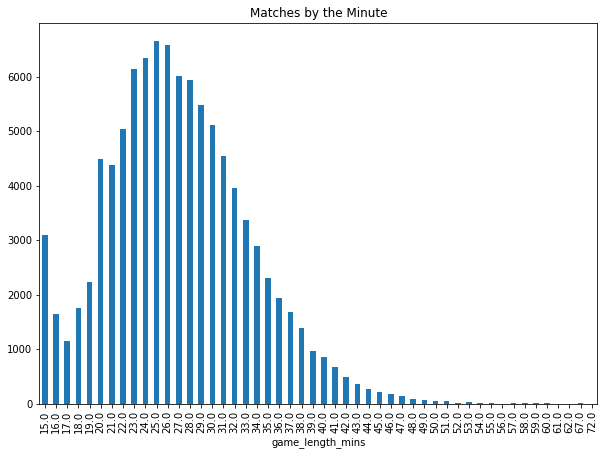

In [36]:
rg.plot(kind='bar', figsize=(10,7), title ='Matches by the Minute')

Its worth noting that games ending before 20 minutes were early surrenders or in some cases games were closed out very fast. Its hard

In [37]:
rc.game_length_mins.describe()

count    98784.000000
mean        27.009445
std          6.368551
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         72.000000
Name: game_length_mins, dtype: float64

The average game time is around 27 minutes.

Taking a look at the champion picks overall

In [74]:
rc

,game_length_mins,tank_count,fighter_count,assassin_count,support_count,marksman_count,mage_count
0,38.0,2,3,2,3,3,5
1,23.0,1,3,5,2,4,3
2,31.0,1,4,3,3,2,5
3,35.0,2,6,1,1,4,2
4,23.0,0,2,4,2,5,5
5,21.0,2,8,3,1,1,3
6,37.0,0,5,7,2,2,1
7,34.0,5,4,2,2,2,3
8,28.0,1,5,2,2,4,3
9,25.0,3,4,4,1,2,5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000262A9DE3E80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000262A90ABF98>], dtype=object)

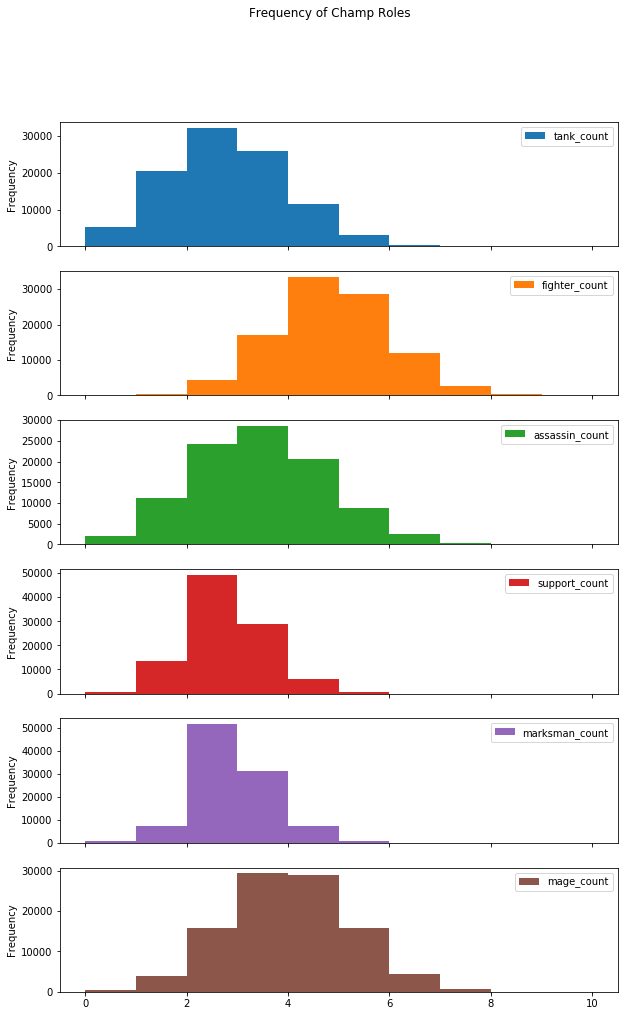

In [91]:
rc.set_index('game_length_mins').plot(kind='hist', subplots=True, figsize=(10, 16), title='Frequency of Champ Roles')

In [128]:
r1 = rc.support_count.sum()
r2 = rc.marksman_count.sum()
r3 = rc.mage_count.sum()
r4 = rc.tank_count.sum()
r5 = rc.assassin_count.sum()
r6 = rc.fighter_count.sum()
tot = r1+r2+r3+r4+r5+r6

In [129]:
print(f'supports: {r1}, {(r1/tot) * 100}%')
print(f'marksmen: {r2}, {(r2/tot) * 100}%')
print(f'mage: {r3}, {(r3/tot) * 100}%')
print(f'tank: {r4}, {(r4/tot) * 100}%')
print(f'assassin: {r5}, {(r5/tot) * 100}%')
print(f'fighter: {r6}, {(r6/tot) * 100}%')

supports: 224616, 12.791759185805008%
marksmen: 236950, 13.494173785823344%
mage: 348255, 19.832933073567876%
tank: 225991, 12.870064688887965%
assassin: 290653, 16.55253046368817%
fighter: 429478, 24.458538802227636%


You can see that the picks of marksman and support almost mirror each other, which makes sense considering that it is meta to always have a support and marksman paired together in a lane in every game.

Looking at how number of tanks affect game times

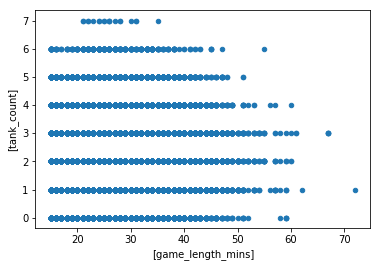

In [79]:
rc.plot(x=['game_length_mins'], y=['tank_count'], kind='scatter')

In [95]:
tank1 = rc[rc.tank_count == 1]
tank2 = rc[rc.tank_count == 2]
tank3 = rc[rc.tank_count == 3]
tank4 = rc[rc.tank_count == 4]
tank5 = rc[rc.tank_count == 5]
tank6 = rc[rc.tank_count == 6]
tank7 = rc[rc.tank_count == 7]

In [94]:
tank1.game_length_mins.describe()

count    20576.000000
mean        27.123396
std          6.489643
min         15.000000
25%         23.000000
50%         27.000000
75%         31.000000
max         72.000000
Name: game_length_mins, dtype: float64

In [96]:
tank2.game_length_mins.describe()

count    32215.000000
mean        26.937420
std          6.382905
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         60.000000
Name: game_length_mins, dtype: float64

In [97]:
tank3.game_length_mins.describe()

count    25928.000000
mean        26.997686
std          6.313269
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         67.000000
Name: game_length_mins, dtype: float64

In [98]:
tank4.game_length_mins.describe()

count    11410.000000
mean        26.893514
std          6.199503
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         60.000000
Name: game_length_mins, dtype: float64

In [99]:
tank5.game_length_mins.describe()

count    2996.000000
mean       27.088785
std         6.250326
min        15.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        51.000000
Name: game_length_mins, dtype: float64

In [100]:
tank6.game_length_mins.describe()

count    408.000000
mean      27.090686
std        6.669754
min       15.000000
25%       22.000000
50%       26.000000
75%       32.000000
max       55.000000
Name: game_length_mins, dtype: float64

In [101]:
tank7.game_length_mins.describe()

count    19.000000
mean     26.052632
std       3.778208
min      21.000000
25%      23.500000
50%      26.000000
75%      28.000000
max      35.000000
Name: game_length_mins, dtype: float64

I first thought that having more tanks in the game would draw out game time.  But more tanks in a game seems to have little affect on the average game time.

Games with assassins should have higher kill counts and higher chance of a champion snowballing

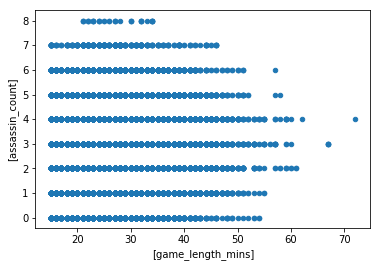

In [102]:
rc.plot(x=['game_length_mins'], y=['assassin_count'], kind='scatter')

In [103]:
a1 = rc[rc.assassin_count == 1]
a2 = rc[rc.assassin_count == 2]
a3 = rc[rc.assassin_count == 3]
a4 = rc[rc.assassin_count == 4]
a5 = rc[rc.assassin_count == 5]
a6 = rc[rc.assassin_count == 6]
a7 = rc[rc.assassin_count == 7]
a8 = rc[rc.assassin_count == 8]

In [104]:
a1.game_length_mins.describe()

count    11303.000000
mean        27.035477
std          6.401126
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         55.000000
Name: game_length_mins, dtype: float64

In [105]:
a2.game_length_mins.describe()

count    24320.000000
mean        27.040872
std          6.356655
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         61.000000
Name: game_length_mins, dtype: float64

In [106]:
a3.game_length_mins.describe()

count    28542.000000
mean        27.012823
std          6.349622
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         67.000000
Name: game_length_mins, dtype: float64

In [107]:
a4.game_length_mins.describe()

count    20606.000000
mean        26.925556
std          6.388186
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         72.000000
Name: game_length_mins, dtype: float64

In [108]:
a5.game_length_mins.describe()

count    8902.000000
mean       27.022804
std         6.288592
min        15.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        58.000000
Name: game_length_mins, dtype: float64

In [109]:
a6.game_length_mins.describe()

count    2534.000000
mean       26.897001
std         6.306243
min        15.000000
25%        23.000000
50%        26.000000
75%        30.000000
max        57.000000
Name: game_length_mins, dtype: float64

In [110]:
a7.game_length_mins.describe()

count    382.000000
mean      27.371728
std        7.084272
min       15.000000
25%       22.000000
50%       27.000000
75%       32.000000
max       46.000000
Name: game_length_mins, dtype: float64

In [111]:
a8.game_length_mins.describe()

count    34.000000
mean     27.205882
std       4.577808
min      21.000000
25%      23.000000
50%      26.500000
75%      32.000000
max      34.000000
Name: game_length_mins, dtype: float64

You can see a small decrease in average game time with 4-6 assassins in a game but nothing too significant.

The highest damage roles are besides the 2 marksmen(one on each team) in every game would be mages and assassins.  Lets see what the game times look like with at least 4 mages and 4 assassins in each game.

In [112]:
b1 = rc[(rc.assassin_count >= 4) & (rc.mage_count >= 4)]

In [113]:
b1.game_length_mins.describe()

count    12232.000000
mean        27.323986
std          6.634538
min         15.000000
25%         23.000000
50%         27.000000
75%         31.000000
max         72.000000
Name: game_length_mins, dtype: float64

Again nothing special.  Let's narrow down the dataframe to games above 40 mins to see what champion pool looks like

In [114]:
v = rc[rc.game_length_mins >= 40]

In [116]:
v.head()


,game_length_mins,tank_count,fighter_count,assassin_count,support_count,marksman_count,mage_count
24,42.0,4,4,2,2,2,4
26,40.0,3,3,2,2,3,5
28,41.0,1,2,5,3,4,4
49,40.0,3,4,6,2,2,2
69,40.0,2,5,2,3,3,5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000263065EA470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000026305F3B160>], dtype=object)

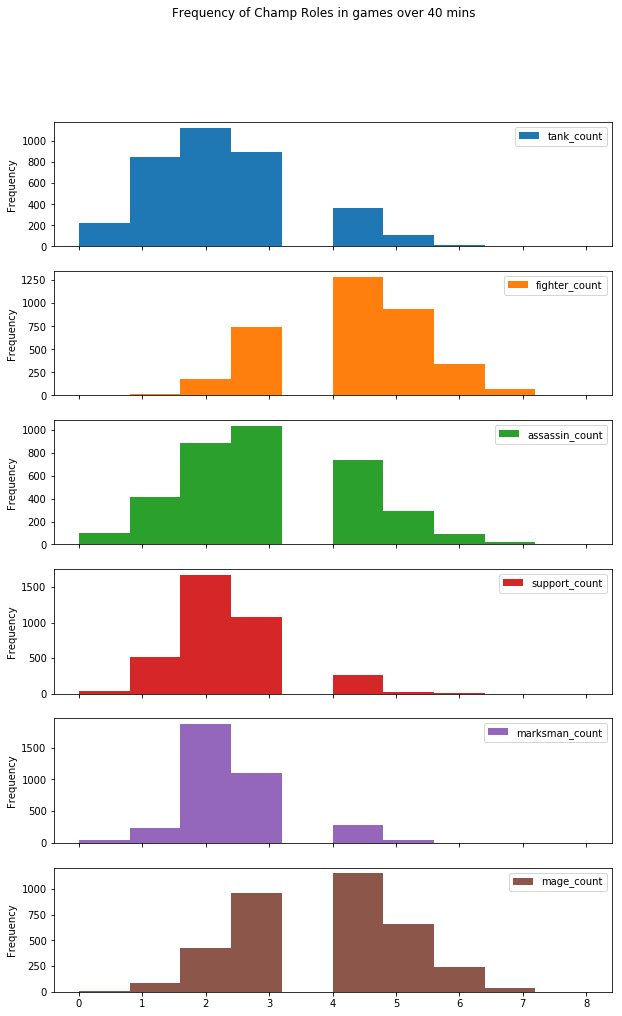

In [118]:
v.set_index('game_length_mins').plot(kind='hist', subplots=True, figsize=(10, 16),
                                     title='Frequency of Champ Roles in games over 40 mins')

In [130]:
v1 = v.support_count.sum()
v2 = v.marksman_count.sum()
v3 = v.mage_count.sum()
v4 = v.tank_count.sum()
v5 = v.assassin_count.sum()
v6 = v.fighter_count.sum()
tot = v1+v2+v3+v4+v5+v6

In [131]:
print(f'supports: {v1}, {(v1/tot) * 100}%')
print(f'marksmen: {v2}, {(v2/tot) * 100}%')
print(f'mage: {v3}, {(v3/tot) * 100}%')
print(f'tank: {v4}, {(v4/tot) * 100}%')
print(f'assassin: {v5}, {(v5/tot) * 100}%')
print(f'fighter: {v6}, {(v6/tot) * 100}%')

supports: 8215, 12.945570298465125%
marksmen: 8611, 13.569605093132466%
mage: 13428, 21.16045258281068%
tank: 7856, 12.379841785117716%
assassin: 10395, 16.380913360017647%
fighter: 14953, 23.563616880456365%


In [132]:
'''
compared to all games above:
supports: 224616, 12.791759185805008%
marksmen: 236950, 13.494173785823344%
mage: 348255, 19.832933073567876%
tank: 225991, 12.870064688887965%
assassin: 290653, 16.55253046368817%
fighter: 429478, 24.458538802227636%
    '''

'\ncompared to all games above:\nsupports: 224616, 12.791759185805008%\nmarksmen: 236950, 13.494173785823344%\nmage: 348255, 19.832933073567876%\ntank: 225991, 12.870064688887965%\nassassin: 290653, 16.55253046368817%\nfighter: 429478, 24.458538802227636%\n    '

What stands out the most is a mages are picked less by 1.3% and fighters are picked more by about 0.9%.  This could be significant given the level of player skill at high rank matches.  This could also say alot about Riot's blancing team and who good a job they do regargless of what people think online.

Explore more questions like specific champion picks and items, look at map objectives